In [2]:
import pandas as pd
import numpy as np

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt

In [3]:
a_data = pd.read_csv("data/clean/Agriculture_clean.csv")
a_data

,state,district,crop,crop_year,season,area,production,yield
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45
345332,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77
345333,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04
345334,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54


In [4]:
a_data.describe()

,crop_year,area,production,yield
count,345336.000000,3.453360e+05,3.453360e+05,345336.000000
mean,2008.887512,1.167147e+04,9.447397e+05,79.475723
std,6.564361,4.584079e+04,2.137618e+07,916.685726
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,7.700000e+01,0.560000
50%,2009.000000,5.320000e+02,6.810000e+02,1.020000
75%,2015.000000,4.112000e+03,6.940000e+03,2.520000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


# EDA on Agriculture data

# Plotting categoricals and numericals

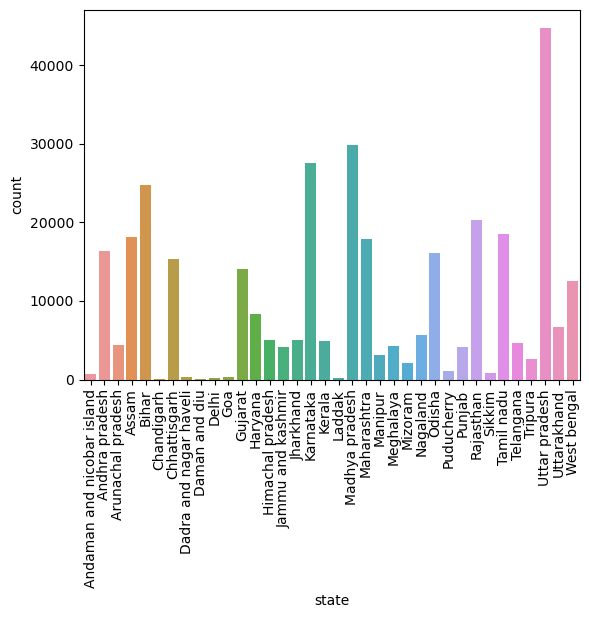

In [5]:
sns.countplot(data = a_data, x = "state")

plt.xticks(rotation = 90)
plt.show()

<Axes: >

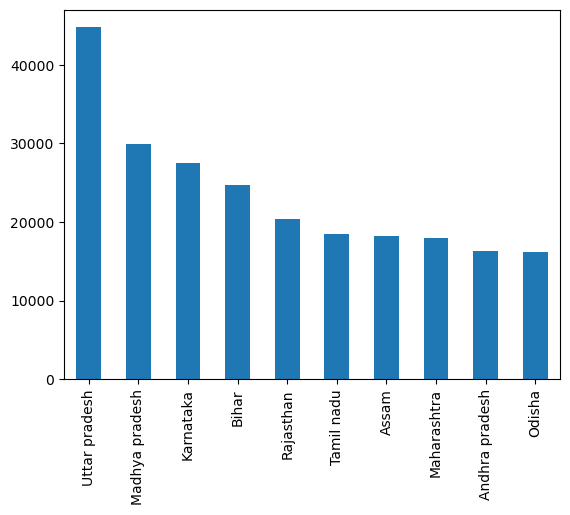

In [6]:
a_data.state.value_counts()[:10].plot(kind = "bar")

<Axes: >

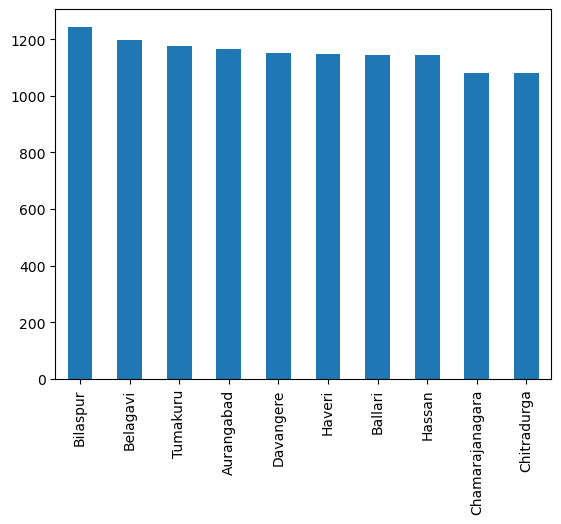

In [7]:
a_data.district.value_counts()[:10].plot(kind = "bar")

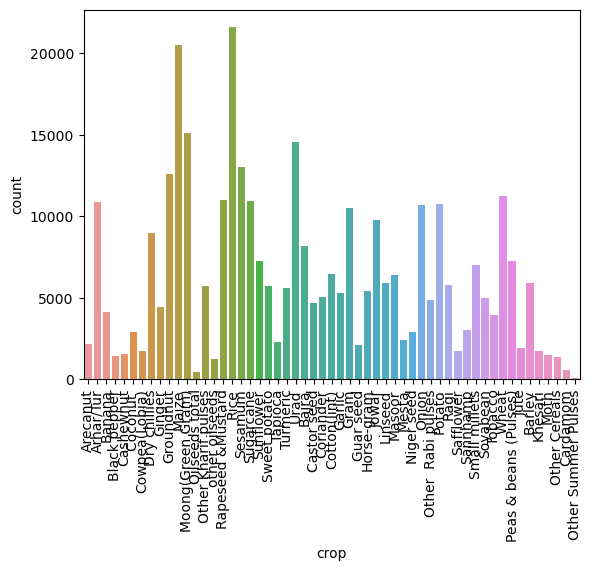

In [8]:
sns.countplot(data = a_data, x = "crop")

plt.xticks(rotation = 90)
plt.show()

In [9]:
a_data.crop.value_counts()[:10]

Rice                 21611
Maize                20513
Moong(Green Gram)    15139
Urad                 14581
Sesamum              13049
Groundnut            12586
Wheat                11220
Rapeseed &Mustard    11034
Sugarcane            10942
Arhar/Tur            10885
Name: crop, dtype: int64

<Axes: >

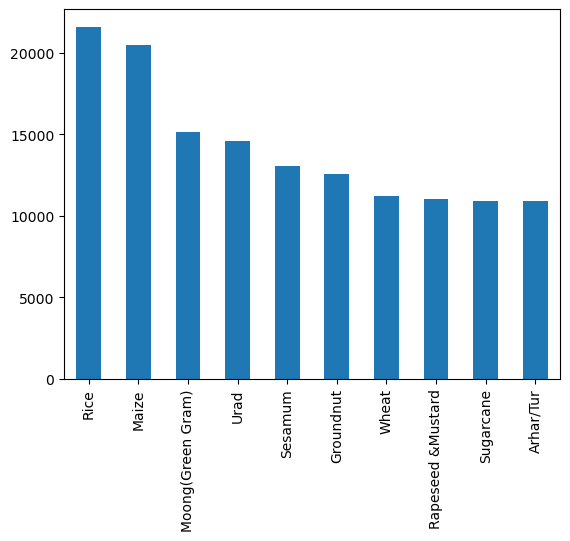

In [10]:
a_data.crop.value_counts()[:10].plot(kind = "bar")

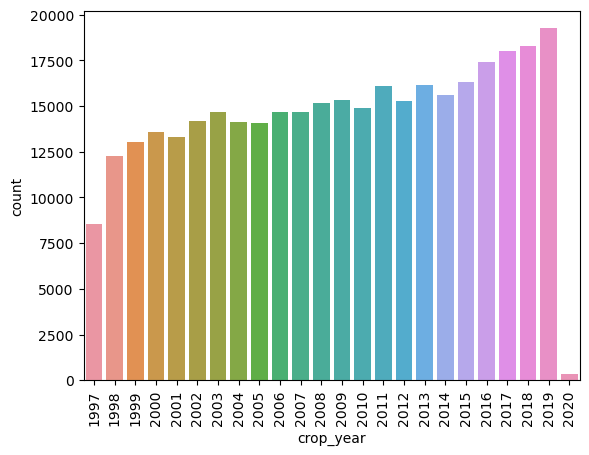

In [11]:
sns.countplot(data = a_data, x = "crop_year")

plt.xticks(rotation = 90)
plt.show()

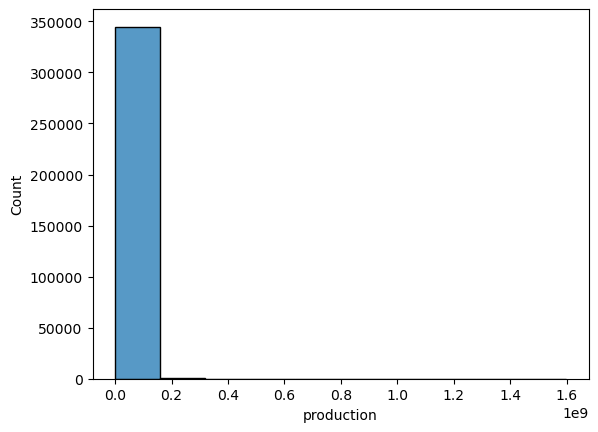

In [12]:
sns.histplot(data = a_data, x = "production", bins = 10)
plt.show()

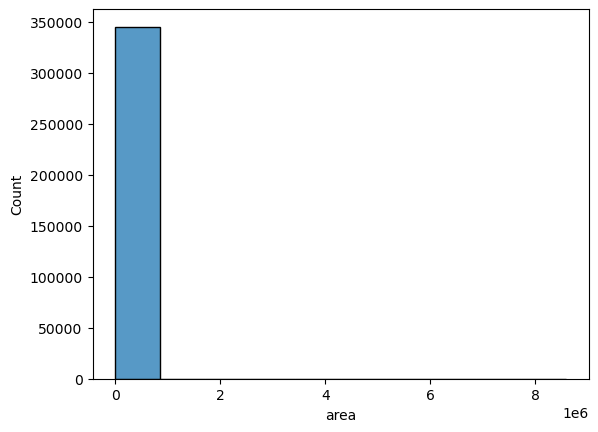

In [13]:
sns.histplot(data = a_data, x = "area", bins = 10)
plt.show()

In [14]:
# sns.displot(data = a_data, x = "area")
# plt.show()

<Axes: xlabel='production'>

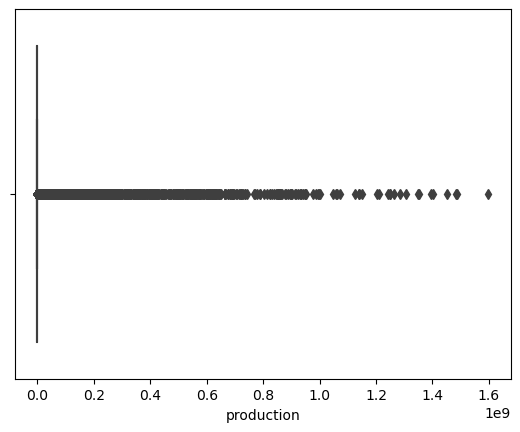

In [15]:
sns.boxplot(data = a_data, x = "production")

<Axes: xlabel='area'>

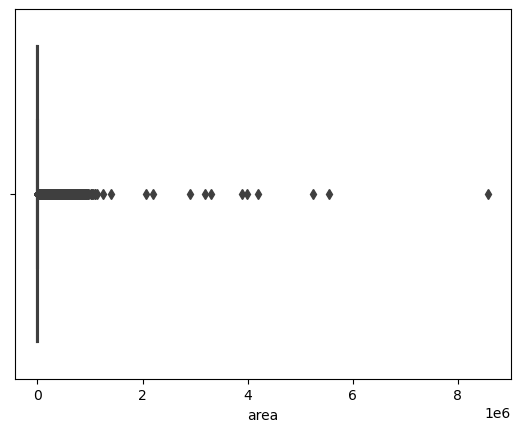

In [16]:
sns.boxplot(data = a_data, x = "area")

<Axes: xlabel='yield'>

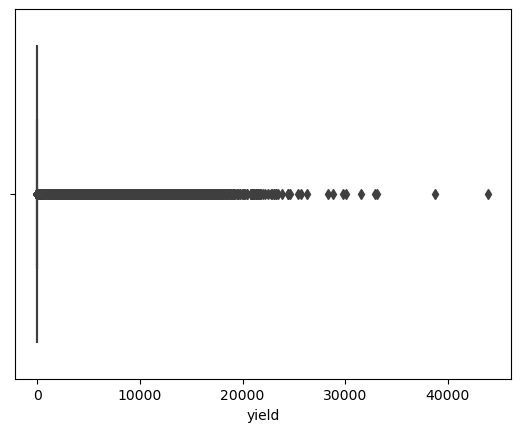

In [17]:
sns.boxplot(data = a_data, x = "yield")

In [18]:
# There are several oultiers in yield, area and production. 
# But not going to delete it as yield/production can be target.

<Axes: xlabel='state'>

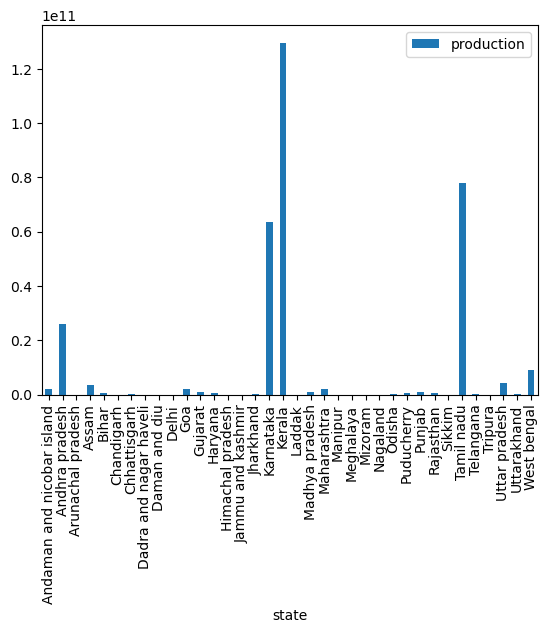

In [19]:
# Surprising that Kerala state has highest crop production.
a_data.groupby(["state"]).agg({"production" : "sum"}).plot(kind = "bar")

<Axes: xlabel='crop'>

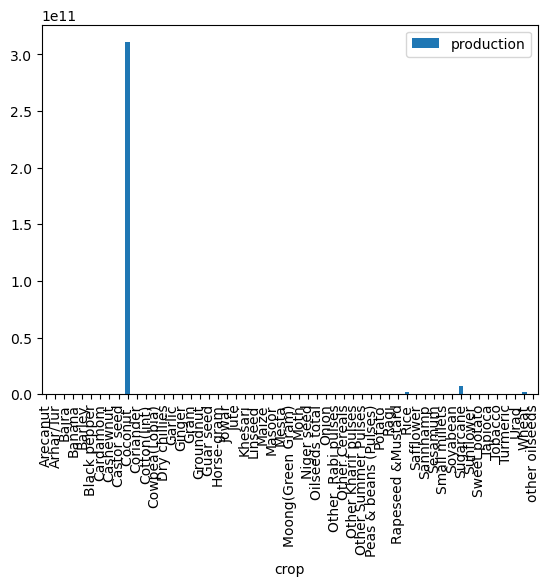

In [20]:
a_data.groupby(["crop"]).agg({"production" : "sum"}).plot(kind = "bar")

<Axes: xlabel='crop_year'>

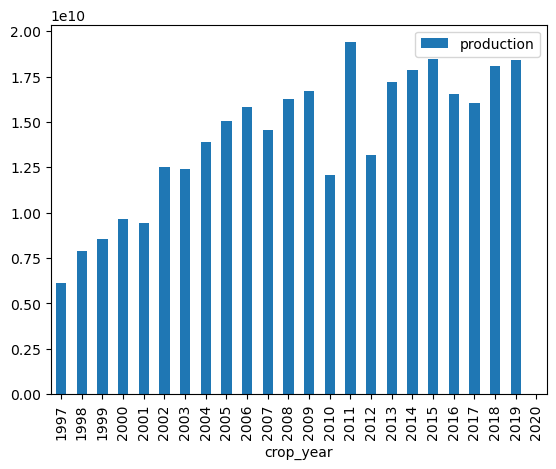

In [21]:
a_data.groupby(["crop_year"]).agg({"production" : "sum"}).plot(kind = "bar")

<Axes: xlabel='season'>

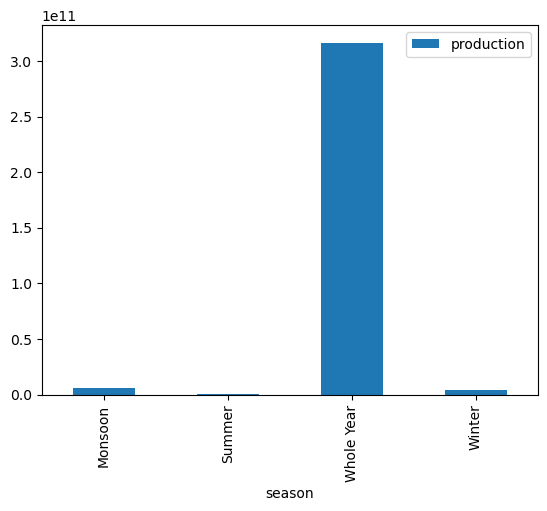

In [22]:
a_data.groupby(["season"]).agg({"production" : "sum"}).plot(kind = "bar")

# EDA on population data

In [23]:
p_data = pd.read_csv("data/clean/Population_clean.csv")
p_data

,state,1951_census,1961_census,1971_census,1981_census,1991_census,2001_census,2011_census
0,Uttar pradesh,60274800,70144160,83849775,105113300,132062800,166053600,199581477
1,Maharashtra,32002500,39554900,50412240,62782820,78937190,96752500,112372972
2,Bihar,29085900,34841490,42126800,52303000,64531200,82879910,103804630
3,West bengal,26300670,34926000,44312017,54580650,68077970,80221300,91347736
4,Madhya pradesh,18615700,23218950,30017180,38169500,48566800,60385090,72597565
5,Tamil nadu,30119680,33687100,41199170,48408080,55859300,62111390,72138958
6,Rajasthan,15971130,20156540,25765810,34361860,44005990,56473300,68621012
7,Karnataka,19402500,23587910,29299015,37135710,44977200,52734986,61130704
8,Gujarat,16263700,20633305,26697488,34085800,41309580,50597200,60383628
9,Andhra pradesh,31115000,35983480,43502710,53551030,66508170,75728400,49386799


In [24]:
p_data.describe()

,1951_census,1961_census,1971_census,1981_census,1991_census,2001_census,2011_census
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,1.003073e+07,1.220141e+07,1.522697e+07,1.898375e+07,2.350881e+07,2.853056e+07,3.362585e+07
std,1.357377e+07,1.609937e+07,1.966793e+07,2.442582e+07,3.033559e+07,3.718812e+07,4.301695e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.442900e+04
25%,2.095175e+05,3.613068e+05,4.718482e+05,6.254468e+05,8.514542e+05,1.067451e+06,1.438945e+06
50%,3.100775e+06,3.586150e+06,4.555216e+06,6.104181e+06,8.570006e+06,1.196090e+07,2.114672e+07
75%,1.604427e+07,2.027573e+07,2.599873e+07,3.415482e+07,4.198368e+07,5.113165e+07,5.213601e+07
max,6.027480e+07,7.014416e+07,8.384978e+07,1.051133e+08,1.320628e+08,1.660536e+08,1.995815e+08


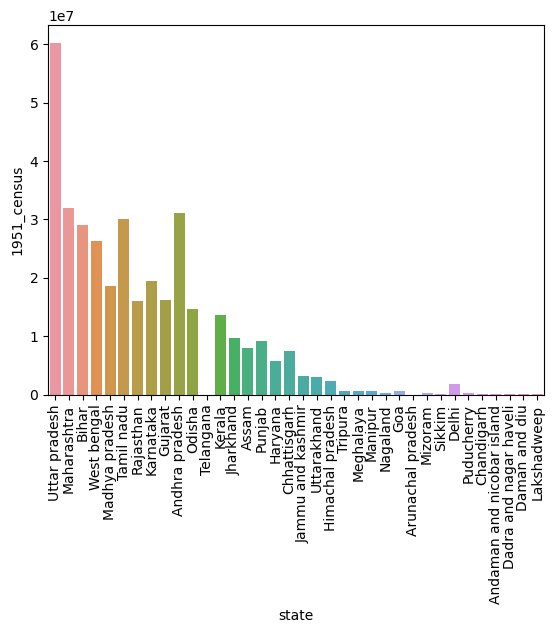

In [25]:
sns.barplot(data = p_data, x = "state", y = "1951_census")

plt.xticks(rotation = 90)
plt.show()

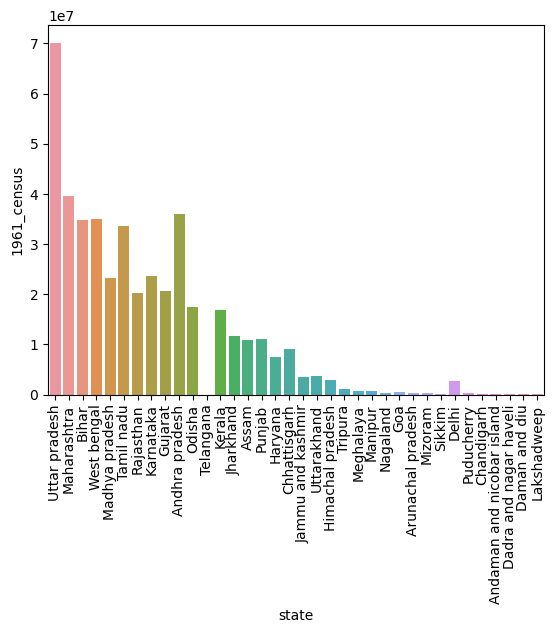

In [26]:
sns.barplot(data = p_data, x = "state", y = "1961_census")

plt.xticks(rotation = 90)
plt.show()

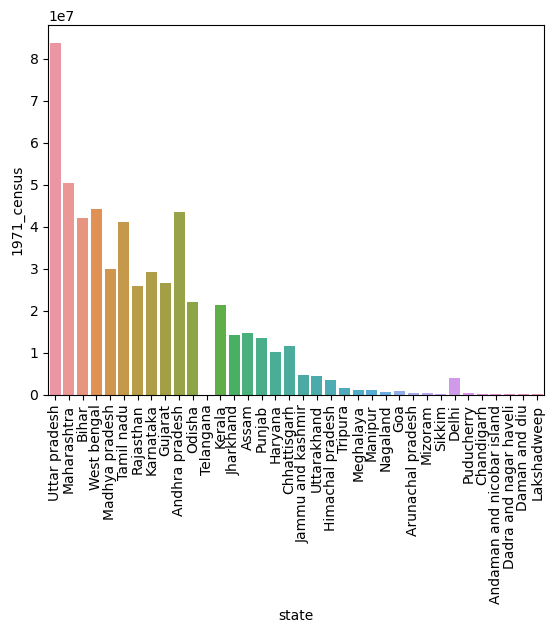

In [27]:
sns.barplot(data = p_data, x = "state", y = "1971_census")

plt.xticks(rotation = 90)
plt.show()

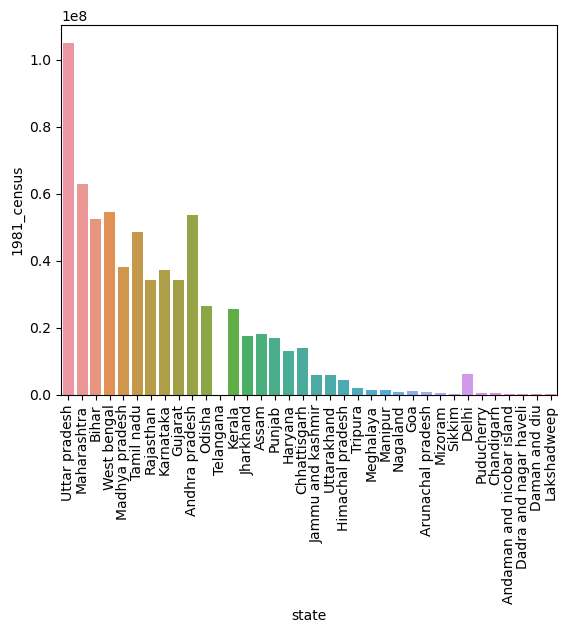

In [28]:
sns.barplot(data = p_data, x = "state", y = "1981_census")

plt.xticks(rotation = 90)
plt.show()

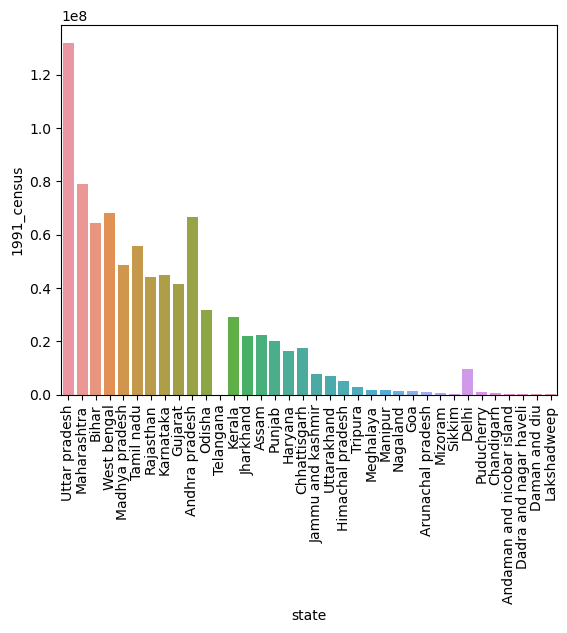

In [29]:
sns.barplot(data = p_data, x = "state", y = "1991_census")

plt.xticks(rotation = 90)
plt.show()

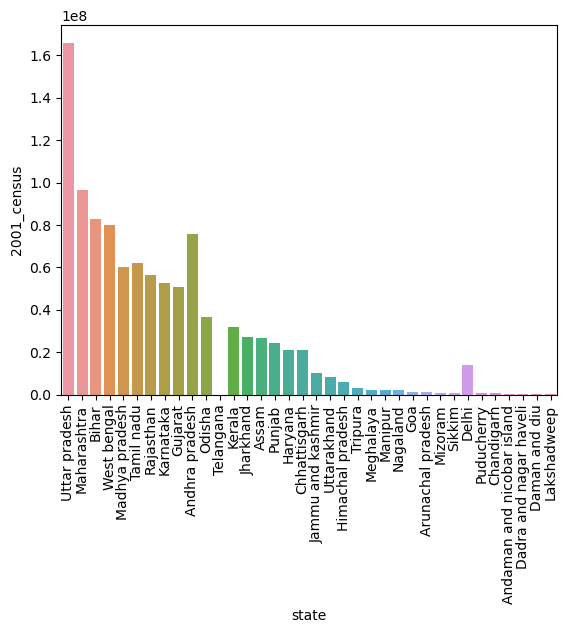

In [30]:
sns.barplot(data = p_data, x = "state", y = "2001_census")

plt.xticks(rotation = 90)
plt.show()

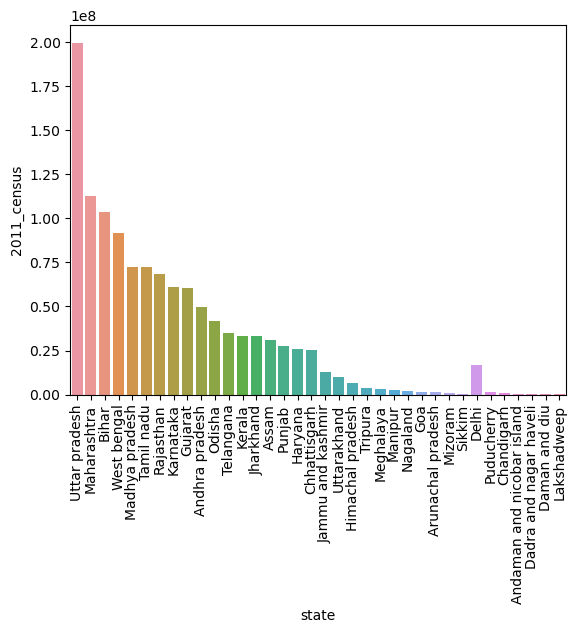

In [31]:
sns.barplot(data = p_data, x = "state", y = "2011_census")

plt.xticks(rotation = 90)
plt.show()

In [32]:
# Throughout the decades the population of Uttar pradesh, Maharashtra and Bihar have been on top. 
# Since they are bigger states. 
# Then among the smaller states, the population of Delhi increased compared to other smaall states.

<Axes: >

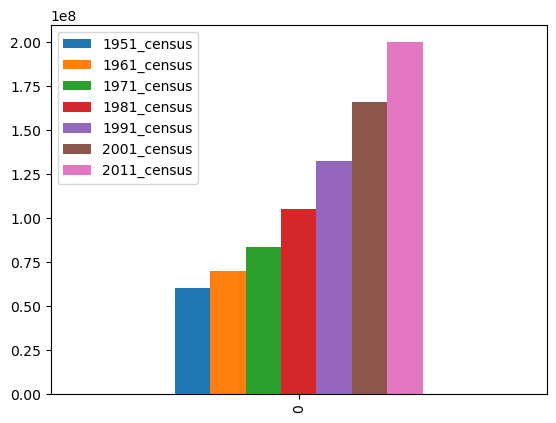

In [33]:
p_data[p_data.state == "Uttar pradesh"].plot(kind = "bar")

# EDA on rainfall data

In [34]:
r_data = pd.read_csv("data/clean/Rainfall_clean.csv")

In [35]:
r_data

,state,district,jan,feb,mar,apr,may,jun,jul,aug,...,jan+feb,mam,jjas,ond,monsoon,autumn,winter,spring,summer,annual_mean
0,Andaman and nicobar island,Nicobar,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,...,165.2,540.7,1207.2,892.1,301.800,326.0,224.466667,57.9,180.233333,233.766667
1,Andaman and nicobar island,South andaman,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,...,69.7,483.5,1757.2,705.3,439.300,301.2,149.266667,26.0,161.166667,251.308333
2,Andaman and nicobar island,N & m andaman,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,...,48.6,405.6,1884.4,574.7,471.100,276.1,110.433333,15.9,135.200000,242.775000
3,Arunachal pradesh,Lohit,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,...,123.0,841.3,1848.5,231.0,462.125,167.1,35.366667,80.8,280.433333,253.650000
4,Arunachal pradesh,East siang,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,...,112.8,645.4,3008.4,268.1,752.100,206.9,31.500000,79.5,215.133333,336.225000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Kerala,Thiruvanantha,19.3,21.1,35.5,116.7,216.6,338.7,228.9,142.0,...,40.4,368.8,871.3,522.7,217.825,268.0,91.333333,21.1,122.933333,150.266667
636,Kerala,Idukki,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,...,35.5,426.6,2276.2,564.2,569.050,343.2,78.133333,22.1,142.200000,275.208333
637,Kerala,Kasargod,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,...,3.3,272.9,3007.5,337.9,751.875,234.9,35.100000,1.0,90.966667,301.800000
638,Kerala,Pathanamthitta,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,...,65.0,553.5,1715.7,624.2,428.925,359.4,94.866667,45.2,184.500000,246.533333


<Axes: xlabel='state'>

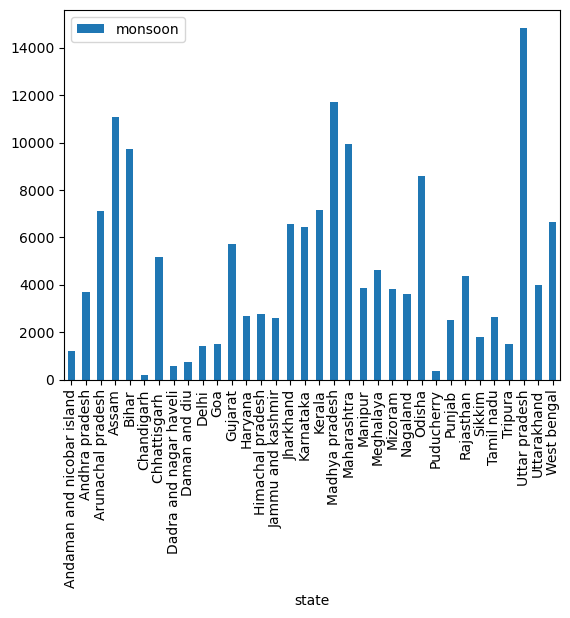

In [36]:
r_data.groupby(["state"]).agg({"monsoon": "sum"}).plot(kind = "bar")

In [37]:
df = r_data.groupby(["state"]).agg({"monsoon": "sum",
                               "autumn": "sum",
                              "winter": "sum",
                              "spring": "sum",
                              "summer": "sum"})
df

,monsoon,autumn,winter,spring,summer
state,,,,,
Andaman and nicobar island,1212.200,903.3,484.166667,99.8,476.600000
Andhra pradesh,3677.325,3187.8,619.866667,169.1,603.633333
Arunachal pradesh,7136.150,2828.3,708.433333,1492.7,3949.033333
Assam,11078.100,3684.1,468.866667,856.3,5336.100000
Bihar,9713.550,2460.4,324.733333,352.6,993.233333
Chandigarh,211.050,31.8,25.866667,38.9,26.033333
Chhattisgarh,5155.975,1113.2,148.100000,188.5,261.466667
Dadra and nagar haveli,579.225,38.6,3.633333,0.3,2.466667
Daman and diu,740.900,71.1,8.933333,1.0,2.966667


In [38]:
df.monsoon.max()

14859.325

In [39]:
df.autumn.max()

5981.7

In [40]:
df.spring.max()

2016.2

In [41]:
df.summer.max()

5336.099999999999

In [42]:
p_data.head()

,state,1951_census,1961_census,1971_census,1981_census,1991_census,2001_census,2011_census
0,Uttar pradesh,60274800,70144160,83849775,105113300,132062800,166053600,199581477
1,Maharashtra,32002500,39554900,50412240,62782820,78937190,96752500,112372972
2,Bihar,29085900,34841490,42126800,52303000,64531200,82879910,103804630
3,West bengal,26300670,34926000,44312017,54580650,68077970,80221300,91347736
4,Madhya pradesh,18615700,23218950,30017180,38169500,48566800,60385090,72597565


In [43]:
a_data.head()

,state,district,crop,crop_year,season,area,production,yield
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75


# Combining population data into agriculture data

In [44]:
a_p_data = a_data.copy()
a_p_data.head()

,state,district,crop,crop_year,season,area,production,yield
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75


In [45]:
# a_p_data = a_p_data.drop(["district"], axis = 1)
a_p_data.crop_year.value_counts()

2019    19264
2018    18301
2017    18008
2016    17416
2015    16339
2013    16178
2011    16126
2014    15586
2009    15339
2012    15278
2008    15149
2010    14888
2007    14680
2006    14675
2003    14660
2002    14178
2004    14149
2005    14062
2000    13588
2001    13305
1999    13011
1998    12289
1997     8548
2020      319
Name: crop_year, dtype: int64

In [46]:
a_p_data.shape

(345336, 8)

In [47]:
a_p_data = a_p_data.drop_duplicates()

In [48]:
print(a_p_data.shape)
a_p_data

(345319, 8)


,state,district,crop,crop_year,season,area,production,yield
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45
345332,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77
345333,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04
345334,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54


In [49]:
p_data_new = p_data.copy()
p_data_new.columns = ["state", 1951, 1961, 1971, 1981, 1991, 2001, 2011]

In [50]:
p_data_new.head()

,state,1951,1961,1971,1981,1991,2001,2011
0,Uttar pradesh,60274800,70144160,83849775,105113300,132062800,166053600,199581477
1,Maharashtra,32002500,39554900,50412240,62782820,78937190,96752500,112372972
2,Bihar,29085900,34841490,42126800,52303000,64531200,82879910,103804630
3,West bengal,26300670,34926000,44312017,54580650,68077970,80221300,91347736
4,Madhya pradesh,18615700,23218950,30017180,38169500,48566800,60385090,72597565


In [51]:
p_data_new = p_data_new.melt(id_vars = ["state"], value_vars = [1951, 1961, 1971, 1981, 1991, 2001, 2011])
p_data_new

,state,variable,value
0,Uttar pradesh,1951,60274800
1,Maharashtra,1951,32002500
2,Bihar,1951,29085900
3,West bengal,1951,26300670
4,Madhya pradesh,1951,18615700
...,...,...,...
247,Chandigarh,2011,1054686
248,Andaman and nicobar island,2011,379944
249,Dadra and nagar haveli,2011,342853
250,Daman and diu,2011,242911


In [52]:
# https://www.entechin.com/find-nearest-value-list-python/#?utm_content=cmp-true

def closest_value(input_value):
    
    input_list = [1951, 1961, 1971, 1981, 1991, 2001, 2011]
    
    difference = lambda input_list : abs(input_list - input_value)
 
    res = min(input_list, key=difference)
 
    return res
  

In [53]:
a_p_data["variable"] = a_p_data.crop_year.apply(closest_value)

In [54]:
a_p_data

,state,district,crop,crop_year,season,area,production,yield,variable
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40,2011
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40,2011
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74,2011
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,2011
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75,2011
...,...,...,...,...,...,...,...,...,...
345331,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45,2011
345332,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77,2011
345333,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04,2011
345334,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54,2011


In [55]:
a_p_data["variable"].value_counts()

2011    212858
2001    132461
Name: variable, dtype: int64

In [56]:
a_p_data_new = pd.merge(a_p_data, p_data_new, how = "inner", on = ["state", "variable"])
a_p_data_new

,state,district,crop,crop_year,season,area,production,yield,variable,value
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40,2011,379944
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40,2011,379944
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74,2011,379944
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,2011,379944
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75,2011,379944
...,...,...,...,...,...,...,...,...,...,...
345140,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45,2011,91347736
345141,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77,2011,91347736
345142,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04,2011,91347736
345143,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54,2011,91347736


In [57]:
a_p_data_new.value.value_counts()

199581477    27385
72597565     18009
166053600    17396
61130704     17389
103804630    12440
             ...  
13851503        95
901080          70
1054686         54
242911          24
158080          18
Name: value, Length: 69, dtype: int64

In [58]:
a_p_data_new = a_p_data_new.rename(columns = {"value" : "population"})

In [59]:
a_p_data_new = a_p_data_new.drop(["variable"], axis = 1)
a_p_data_new

,state,district,crop,crop_year,season,area,production,yield,population
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40,379944
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40,379944
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74,379944
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,379944
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75,379944
...,...,...,...,...,...,...,...,...,...
345140,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45,91347736
345141,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77,91347736
345142,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04,91347736
345143,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54,91347736


In [60]:
a_p_data_new.isna().sum()

state         0
district      0
crop          0
crop_year     0
season        0
area          0
production    0
yield         0
population    0
dtype: int64

In [61]:
a_p_data_new.state.value_counts()

Uttar pradesh                 44781
Madhya pradesh                29906
Karnataka                     27493
Bihar                         24697
Rajasthan                     20363
Tamil nadu                    18507
Assam                         18186
Maharashtra                   17922
Andhra pradesh                16363
Odisha                        16153
Chhattisgarh                  15285
Gujarat                       14053
West bengal                   12596
Haryana                        8305
Uttarakhand                    6702
Nagaland                       5676
Himachal pradesh               5043
Jharkhand                      4991
Kerala                         4870
Telangana                      4684
Arunachal pradesh              4345
Meghalaya                      4322
Jammu and kashmir              4175
Punjab                         4142
Manipur                        3089
Tripura                        2557
Mizoram                        2102
Puducherry                  

# Combining rainfall data into agriculture data

In [62]:
r_data.head()

,state,district,jan,feb,mar,apr,may,jun,jul,aug,...,jan+feb,mam,jjas,ond,monsoon,autumn,winter,spring,summer,annual_mean
0,Andaman and nicobar island,Nicobar,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,...,165.2,540.7,1207.2,892.1,301.800,326.0,224.466667,57.9,180.233333,233.766667
1,Andaman and nicobar island,South andaman,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,...,69.7,483.5,1757.2,705.3,439.300,301.2,149.266667,26.0,161.166667,251.308333
2,Andaman and nicobar island,N & m andaman,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,...,48.6,405.6,1884.4,574.7,471.100,276.1,110.433333,15.9,135.200000,242.775000
3,Arunachal pradesh,Lohit,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,...,123.0,841.3,1848.5,231.0,462.125,167.1,35.366667,80.8,280.433333,253.650000
4,Arunachal pradesh,East siang,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,...,112.8,645.4,3008.4,268.1,752.100,206.9,31.500000,79.5,215.133333,336.225000


In [63]:
r_data.state.unique()

array(['Andaman and nicobar island', 'Arunachal pradesh', 'Assam',
       'Meghalaya', 'Manipur', 'Mizoram', 'Nagaland', 'Tripura',
       'West bengal', 'Sikkim', 'Odisha', 'Jharkhand', 'Bihar',
       'Uttar pradesh', 'Uttarakhand', 'Haryana', 'Chandigarh', 'Delhi',
       'Punjab', 'Himachal pradesh', 'Jammu and kashmir', 'Rajasthan',
       'Madhya pradesh', 'Gujarat', 'Dadra and nagar haveli',
       'Daman and diu', 'Maharashtra', 'Goa', 'Chhattisgarh ',
       'Andhra pradesh', 'Tamil nadu', 'Puducherry', 'Karnataka',
       'Kerala'], dtype=object)

In [64]:
r_data_new = r_data[["state", "district","monsoon", "autumn", "winter", "spring", "summer", "annual_mean"]]
r_data_new.head()

,state,district,monsoon,autumn,winter,spring,summer,annual_mean
0,Andaman and nicobar island,Nicobar,301.800,326.0,224.466667,57.9,180.233333,233.766667
1,Andaman and nicobar island,South andaman,439.300,301.2,149.266667,26.0,161.166667,251.308333
2,Andaman and nicobar island,N & m andaman,471.100,276.1,110.433333,15.9,135.200000,242.775000
3,Arunachal pradesh,Lohit,462.125,167.1,35.366667,80.8,280.433333,253.650000
4,Arunachal pradesh,East siang,752.100,206.9,31.500000,79.5,215.133333,336.225000


In [65]:
a_p_data_new.season.value_counts()

Monsoon       145328
Winter        109046
Whole Year     68673
Summer         22098
Name: season, dtype: int64

In [66]:
r_data_new = r_data_new.rename(columns = {"monsoon" : "Monsoon",
                                         "autumn" : "Autumn",
                                         "winter" : "Winter",
                                         "summer" : "Summer",
                                         "annual_mean" : "Whole Year"})

In [67]:
r_data_new = r_data_new.melt(id_vars = ["state", "district"], value_vars = ["Monsoon", "Winter", "Summer", "Whole Year"])

In [68]:
r_data_new = r_data_new.rename(columns = {"variable" : "season"})
r_data_new

,state,district,season,value
0,Andaman and nicobar island,Nicobar,Monsoon,301.800000
1,Andaman and nicobar island,South andaman,Monsoon,439.300000
2,Andaman and nicobar island,N & m andaman,Monsoon,471.100000
3,Arunachal pradesh,Lohit,Monsoon,462.125000
4,Arunachal pradesh,East siang,Monsoon,752.100000
...,...,...,...,...
2555,Kerala,Thiruvanantha,Whole Year,150.266667
2556,Kerala,Idukki,Whole Year,275.208333
2557,Kerala,Kasargod,Whole Year,301.800000
2558,Kerala,Pathanamthitta,Whole Year,246.533333


In [69]:
a_p_data_new.shape

(345145, 9)

In [70]:
a_p_r_data = pd.merge(a_p_data_new, r_data_new, how = "left", left_on = ["state", "district", "season"], right_on = ["state", "district", "season"])

In [71]:
a_p_r_data

,state,district,crop,crop_year,season,area,production,yield,population,value
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40,379944,NaN
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40,379944,NaN
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74,379944,NaN
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,379944,NaN
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75,379944,NaN
...,...,...,...,...,...,...,...,...,...,...
345140,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45,91347736,12.866667
345141,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77,91347736,12.866667
345142,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04,91347736,12.866667
345143,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54,91347736,12.866667


In [72]:
a_p_r_data.isna().sum()

state              0
district           0
crop               0
crop_year          0
season             0
area               0
production         0
yield              0
population         0
value         100885
dtype: int64

In [73]:
a_p_r_data = a_p_r_data.rename(columns = {"value" : "mean_rainfall"})

In [74]:
a_p_r_data.mean_rainfall.mode()

0    10.2
Name: mean_rainfall, dtype: float64

In [75]:
a_p_r_data.mean_rainfall.mean()

126.49785423319416

In [76]:
# Filling the Nan values with mean values

a_p_r_data.mean_rainfall = a_p_r_data.mean_rainfall.fillna(a_p_r_data.mean_rainfall.mean())

In [77]:
a_p_r_data.isnull().sum()

state            0
district         0
crop             0
crop_year        0
season           0
area             0
production       0
yield            0
population       0
mean_rainfall    0
dtype: int64

In [78]:
a_p_r_data

,state,district,crop,crop_year,season,area,production,yield,population,mean_rainfall
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40,379944,126.497854
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40,379944,126.497854
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74,379944,126.497854
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,379944,126.497854
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75,379944,126.497854
...,...,...,...,...,...,...,...,...,...,...
345140,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45,91347736,12.866667
345141,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77,91347736,12.866667
345142,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04,91347736,12.866667
345143,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54,91347736,12.866667


In [79]:
# There are several district which are low in count. Hence categorizing them under 'Other'

district_df = pd.DataFrame(data = a_p_r_data.district.value_counts()).reset_index()
district_df.columns = ["name" , "count"]

display(district_df.dtypes)

names = []

for i in district_df.index:
    
    if district_df["count"][i] < 100:
        
        names.append(district_df["name"][i])

    
names

name     object
count     int64
dtype: object

['Suryapet',
 'Rajanna',
 'Palghar',
 'Kupwara',
 'Hanumakonda',
 'Jagitial',
 'Peddapalli',
 'Jhargram',
 'Ganderbal',
 'Fazilka',
 'Longding',
 'Paschim bardhaman',
 'Kra daadi',
 'Shopian',
 'Pathankot',
 'Medchal malkajgiri',
 'Leh ladakh',
 'Ramban',
 'Narayanapet',
 'Charki dadri',
 'Kalimpong',
 'Lower siang',
 'Mulugu',
 'Kamle',
 'Gaurella-pendra-marwahi',
 'Kargil',
 'Diu',
 'Daman',
 'Leparada',
 'Pakke kessang',
 'Shi yomi',
 'Chennai',
 'Hyderabad',
 'Niwari',
 'Tirupathur',
 'Tenkasi',
 'Chengalpattu',
 'Kallakurichi',
 'Ranipet',
 'West karbi anglong',
 'Mumbai suburban',
 'Biswanath',
 'Charaideo',
 'Hojai',
 'Majuli',
 'Mumbai',
 'South salmara mancachar']

In [80]:
a_p_r_data.district = a_p_r_data.district.apply(lambda x: 'other' if x in names else x)

a_p_r_data.district.value_counts()

other          1997
Bilaspur       1244
Belagavi       1197
Tumakuru       1175
Aurangabad     1164
               ... 
Mancherial      109
Barnala         108
Jayashankar     103
Namsai          103
Siang           101
Name: district, Length: 661, dtype: int64

# Importing Agriculture + Population + Rainfall data into .csv

In [81]:
a_p_r_data.to_csv("data/clean/Agriculture_Population_Rainfall.csv", index = False)

In [82]:
a_p_r_data[a_p_r_data.crop == "Rice"].season.value_counts()

Monsoon       12930
Winter         4502
Summer         4105
Whole Year       74
Name: season, dtype: int64

# Hypothesis Testing

In [83]:
# H0: The sum of Crop production is < the sum of population for year = 1997 - 2011. 
# H1: The sum of Crop production is > the sum of population for year = 1997 - 2011.

import scipy.stats as st

population = p_data_new[(p_data_new.variable == 1991) | (p_data_new.variable == 2011)]["value"]
production = a_data[(a_data.crop_year == 1991) | (a_data.crop_year == 2011)]["production"]

st.ttest_ind(a_p_r_data.population, a_p_r_data.production, equal_var=False)

Ttest_indResult(statistic=707.3796963810536, pvalue=0.0)

In [84]:
# We reject the null hypothesis because p-val is 0 which is less than 0.05.
# As the statistics is positive which means that sum(population) is greater than sum(production)

In [85]:
p_data_new[(p_data_new.variable == 1991) | (p_data_new.variable == 2011)]["value"].sum()

2056847601

In [86]:
print(population.mean())
print(production.mean())

28567327.791666668
1202925.0894828227


In [87]:
28567327/ 1202925

23.748219548184633

In [88]:
# H0: The sum of Crop production is < the sum of population for year = 2011. 
# H1: The sum of Crop production is > the sum of population for year = 2011.

population1 = p_data_new[p_data_new.variable == 2011]["value"]
production1 = a_data[a_data.crop_year == 2011]["production"]

st.ttest_ind(population1, production1, equal_var=False)

Ttest_indResult(statistic=4.5205372849285546, pvalue=6.744306595075011e-05)

In [89]:
# We reject the null hypothesis because p-val is 0 which is less than 0.05.

In [91]:
p_data_new[p_data_new.variable == 2011]["value"].sum()

1210530555

In [92]:
a_data[a_data.crop_year == 2011]["production"].sum()

19398369993.0

In [1]:
19398369993/1210530555

16.02468431125227